# Aufgabenstellung

übernommen aus: https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

In [75]:
import pandas as pd
df = pd.read_csv("ViewingActivity-sample.csv", sep=",")
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


In [76]:
df.shape

(200, 10)

In [77]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [78]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


In [79]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [80]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [81]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

df.head()

,Start Time,Duration,Title
0,2013-03-20 01:17:53-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:45-04:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:21-04:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:03-04:00,0:48:14,The Invisible War
4,2013-03-19 20:10:31-04:00,0:04:51,The Invisible War


In [82]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [83]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]


In [84]:
office.shape

(137, 3)

In [85]:
office['Duration'].sum()


Timedelta('1 days 15:00:39')

In [86]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour
office.head()

/var/folders/h1/h3f20cfn49x4v_7l8wlcyymh0000gt/T/ipykernel_52567/737907980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = office['Start Time'].dt.weekday
/var/folders/h1/h3f20cfn49x4v_7l8wlcyymh0000gt/T/ipykernel_52567/737907980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = office['Start Time'].dt.hour


,Start Time,Duration,Title,weekday,hour
9,2013-03-18 19:25:36-04:00,0 days 00:00:02,The Office (U.S.): Season 5: The Duel (Episode...,0,19
10,2013-03-18 19:04:22-04:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,19
11,2013-03-18 18:42:50-04:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,0,18
12,2013-03-18 18:21:52-04:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,0,18
13,2013-03-18 18:20:53-04:00,0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...,0,18


In [87]:
#%matplotlib inline
import matplotlib.pyplot as plt

/var/folders/h1/h3f20cfn49x4v_7l8wlcyymh0000gt/T/ipykernel_52567/2124687469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = pd.Categorical(office['weekday'], categories=


<Axes: title={'center': 'Office Episodes Watched by Day'}, xlabel='weekday'>

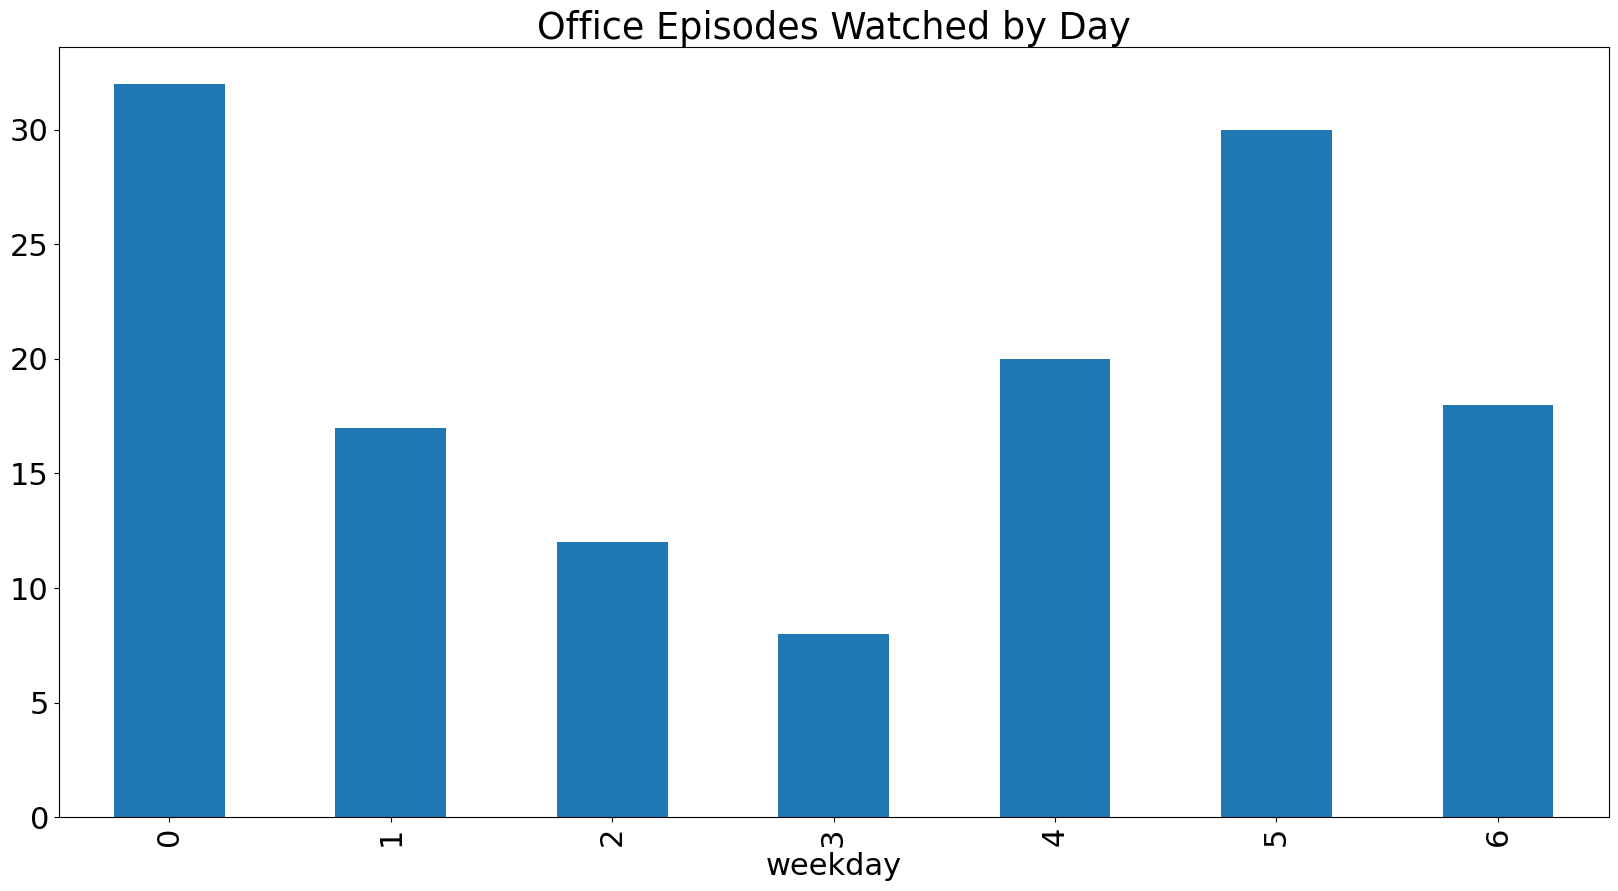

In [88]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
plt.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

/var/folders/h1/h3f20cfn49x4v_7l8wlcyymh0000gt/T/ipykernel_52567/1615605380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = pd.Categorical(office['hour'], categories=


<Axes: title={'center': 'Office Episodes Watched by Hour'}, xlabel='hour'>

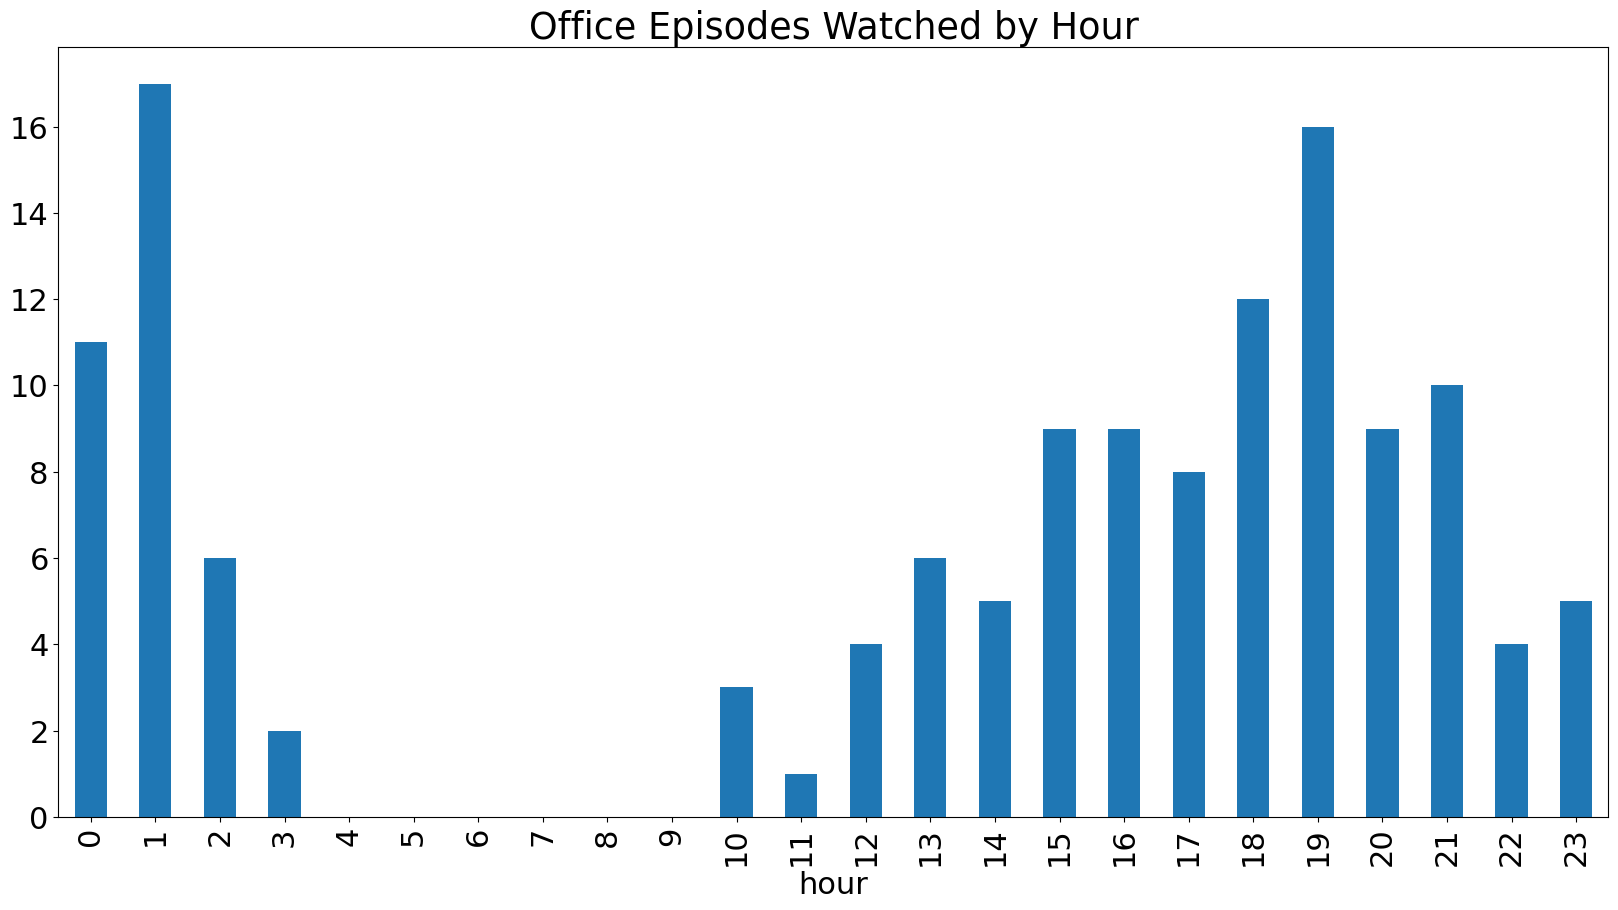

In [89]:
# set our categorical and define the order so the hours are plotted 0-23
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')